# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

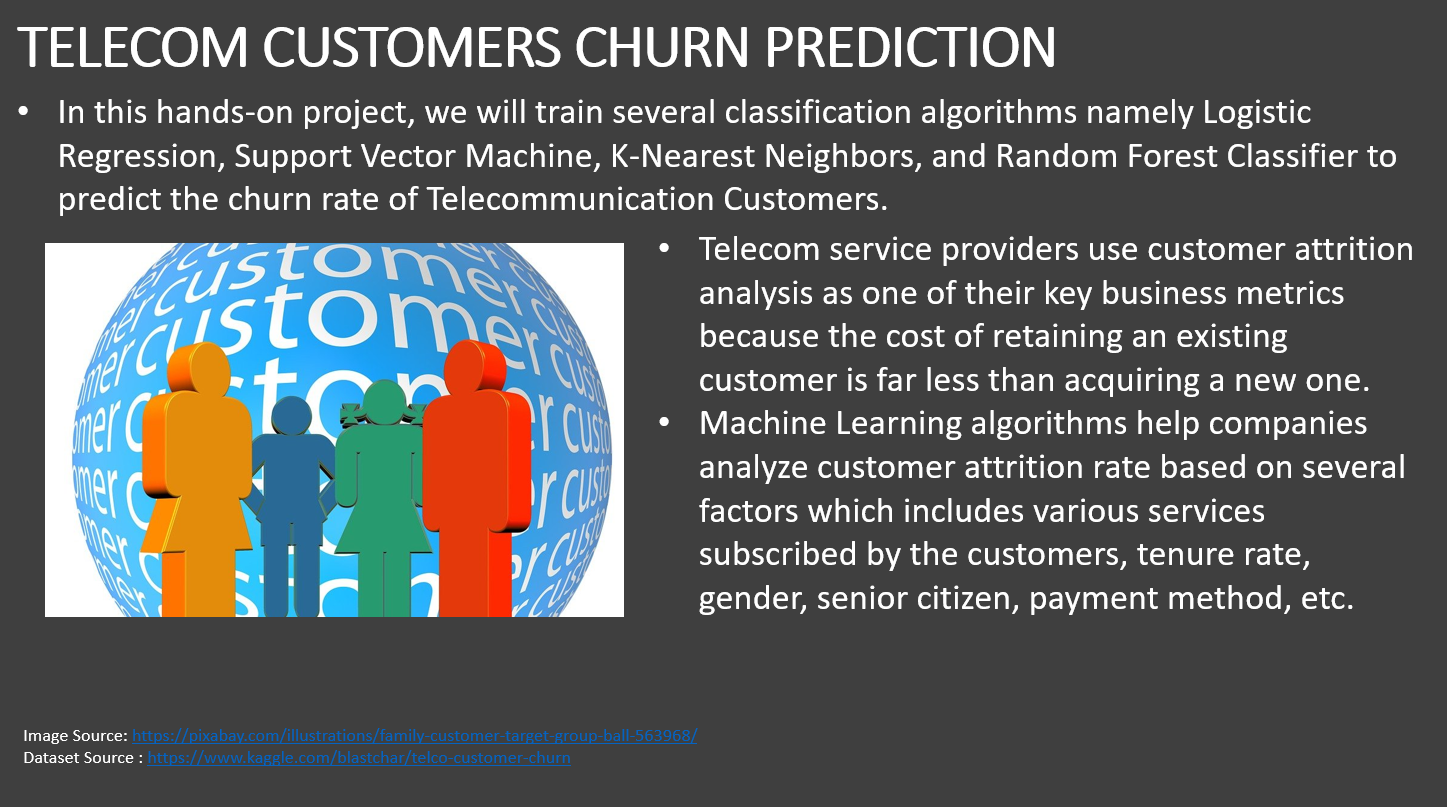

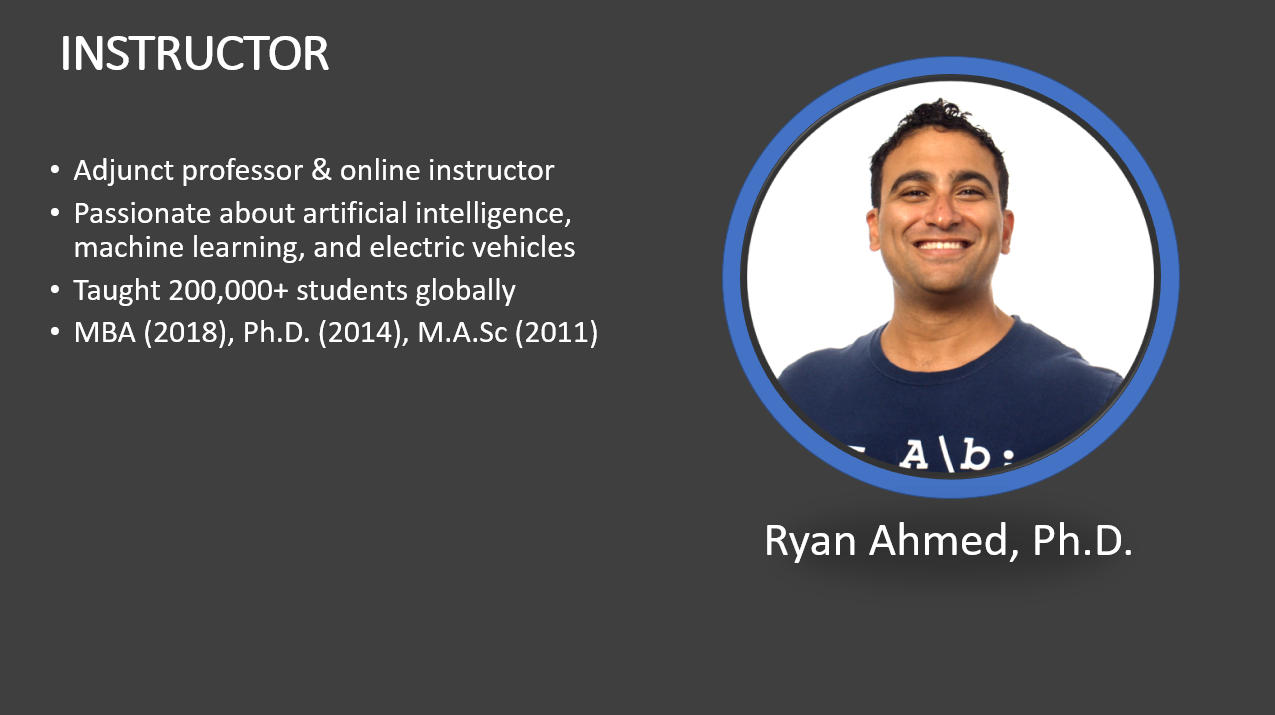

MINI CHALLENGE #1:

- Name top 5 telecom companies in North America in 2020?

# TASK #2: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [1]:
!pip install cufflinks
# Cufflinks is a third-party wrapper library around Plotly

tensorboard 2.1.1 has requirement setuptools>=41.0.0, but you'll have setuptools 39.0.1 which is incompatible.
google-auth 1.12.0 has requirement setuptools>=40.3.0, but you'll have setuptools 39.0.1 which is incompatible.
You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import plotly.express as px # Interactive Data Visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline() 
init_notebook_mode(connected=True) # To connect Jupyter notebook with JavaScript
from jupyterthemes import jtplot # Jupyter theme
jtplot.style(theme= 'monokai', context= 'notebook', ticks= True, grid= False)

In [4]:
# Read the CSV file 
tele_churn = pd.read_csv('telecom_churn.csv')

In [5]:
# Load the top 5 instances
tele_churn.head()

state  account_length  area_code  phone_number  international_plan  \
0     16             128        415          2845                   0   
1     35             107        415          2301                   0   
2     31             137        415          1616                   0   
3     35              84        408          2510                   1   
4     36              75        415           155                   1   

   voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0                1                     25              265.1              110   
1                1                     26              161.6              123   
2                0                      0              243.4              114   
3                0                      0              299.4               71   
4                0                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls  class  
0                              1      0  
1                              1      0  
2                              0      0  
3                              2      0  
4                              3      0  

[5 rows x 21 columns]

In [6]:
# Load the bottom 5 instances 
tele_churn.tail()

state  account_length  area_code  phone_number  international_plan  \
4995     11              50        408          2000                   0   
4996     49             152        415           394                   0   
4997      7              61        415           313                   0   
4998      7             109        510          3471                   0   
4999     46              86        415          2412                   0   

      voice_mail_plan  number_vmail_messages  total_day_minutes  \
4995                1                     40              235.7   
4996                0                      0              184.2   
4997                0                      0              140.6   
4998                0                      0              188.8   
4999                1                     34              129.4   

      total_day_calls  total_day_charge  ...  total_eve_calls  \
4995              127             40.07  ...              126   
4996               90             31.31  ...               73   
4997               89             23.90  ...              128   
4998               67             32.10  ...               92   
4999              102             22.00  ...              104   

      total_eve_charge  total_night_minutes  total_night_calls  \
4995             18.96                297.5                116   
4996             21.83                213.6                113   
4997             14.69                212.4                 97   
4998             14.59                224.4                 89   
4999             22.70                154.8                100   

      total_night_charge  total_intl_minutes  total_intl_calls  \
4995               13.39                 9.9                 5   
4996                9.61                14.7                 2   
4997                9.56                13.6                 4   
4998               10.10                 8.5                 6   
4999                6.97                 9.3                16   

      total_intl_charge  number_customer_service_calls  class  
4995               2.67                              2      0  
4996               3.97                              3      1  
4997               3.67                              1      0  
4998               2.30                              0      0  
4999               2.51                              0      0  

[5 rows x 21 columns]

In [8]:
# Check the shape of the dataframe
tele_churn.shape

(5000, 21)

In [11]:
# Display the feature columns
tele_churn.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [13]:
# Obtain the summary of the dataframe
tele_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

MINI CHALLENGE #2:
- What is the maximum and average daily minutes?

In [20]:
tele_churn.total_day_minutes.describe()

count    5000.000000
mean      180.288900
std        53.894699
min         0.000000
25%       143.700000
50%       180.100000
75%       216.200000
max       351.500000
Name: total_day_minutes, dtype: float64

The maximum is 351.5 minutes and the average daily minutes id 180.29

# TASK #3: PERFORM DATA VISUALIZATION

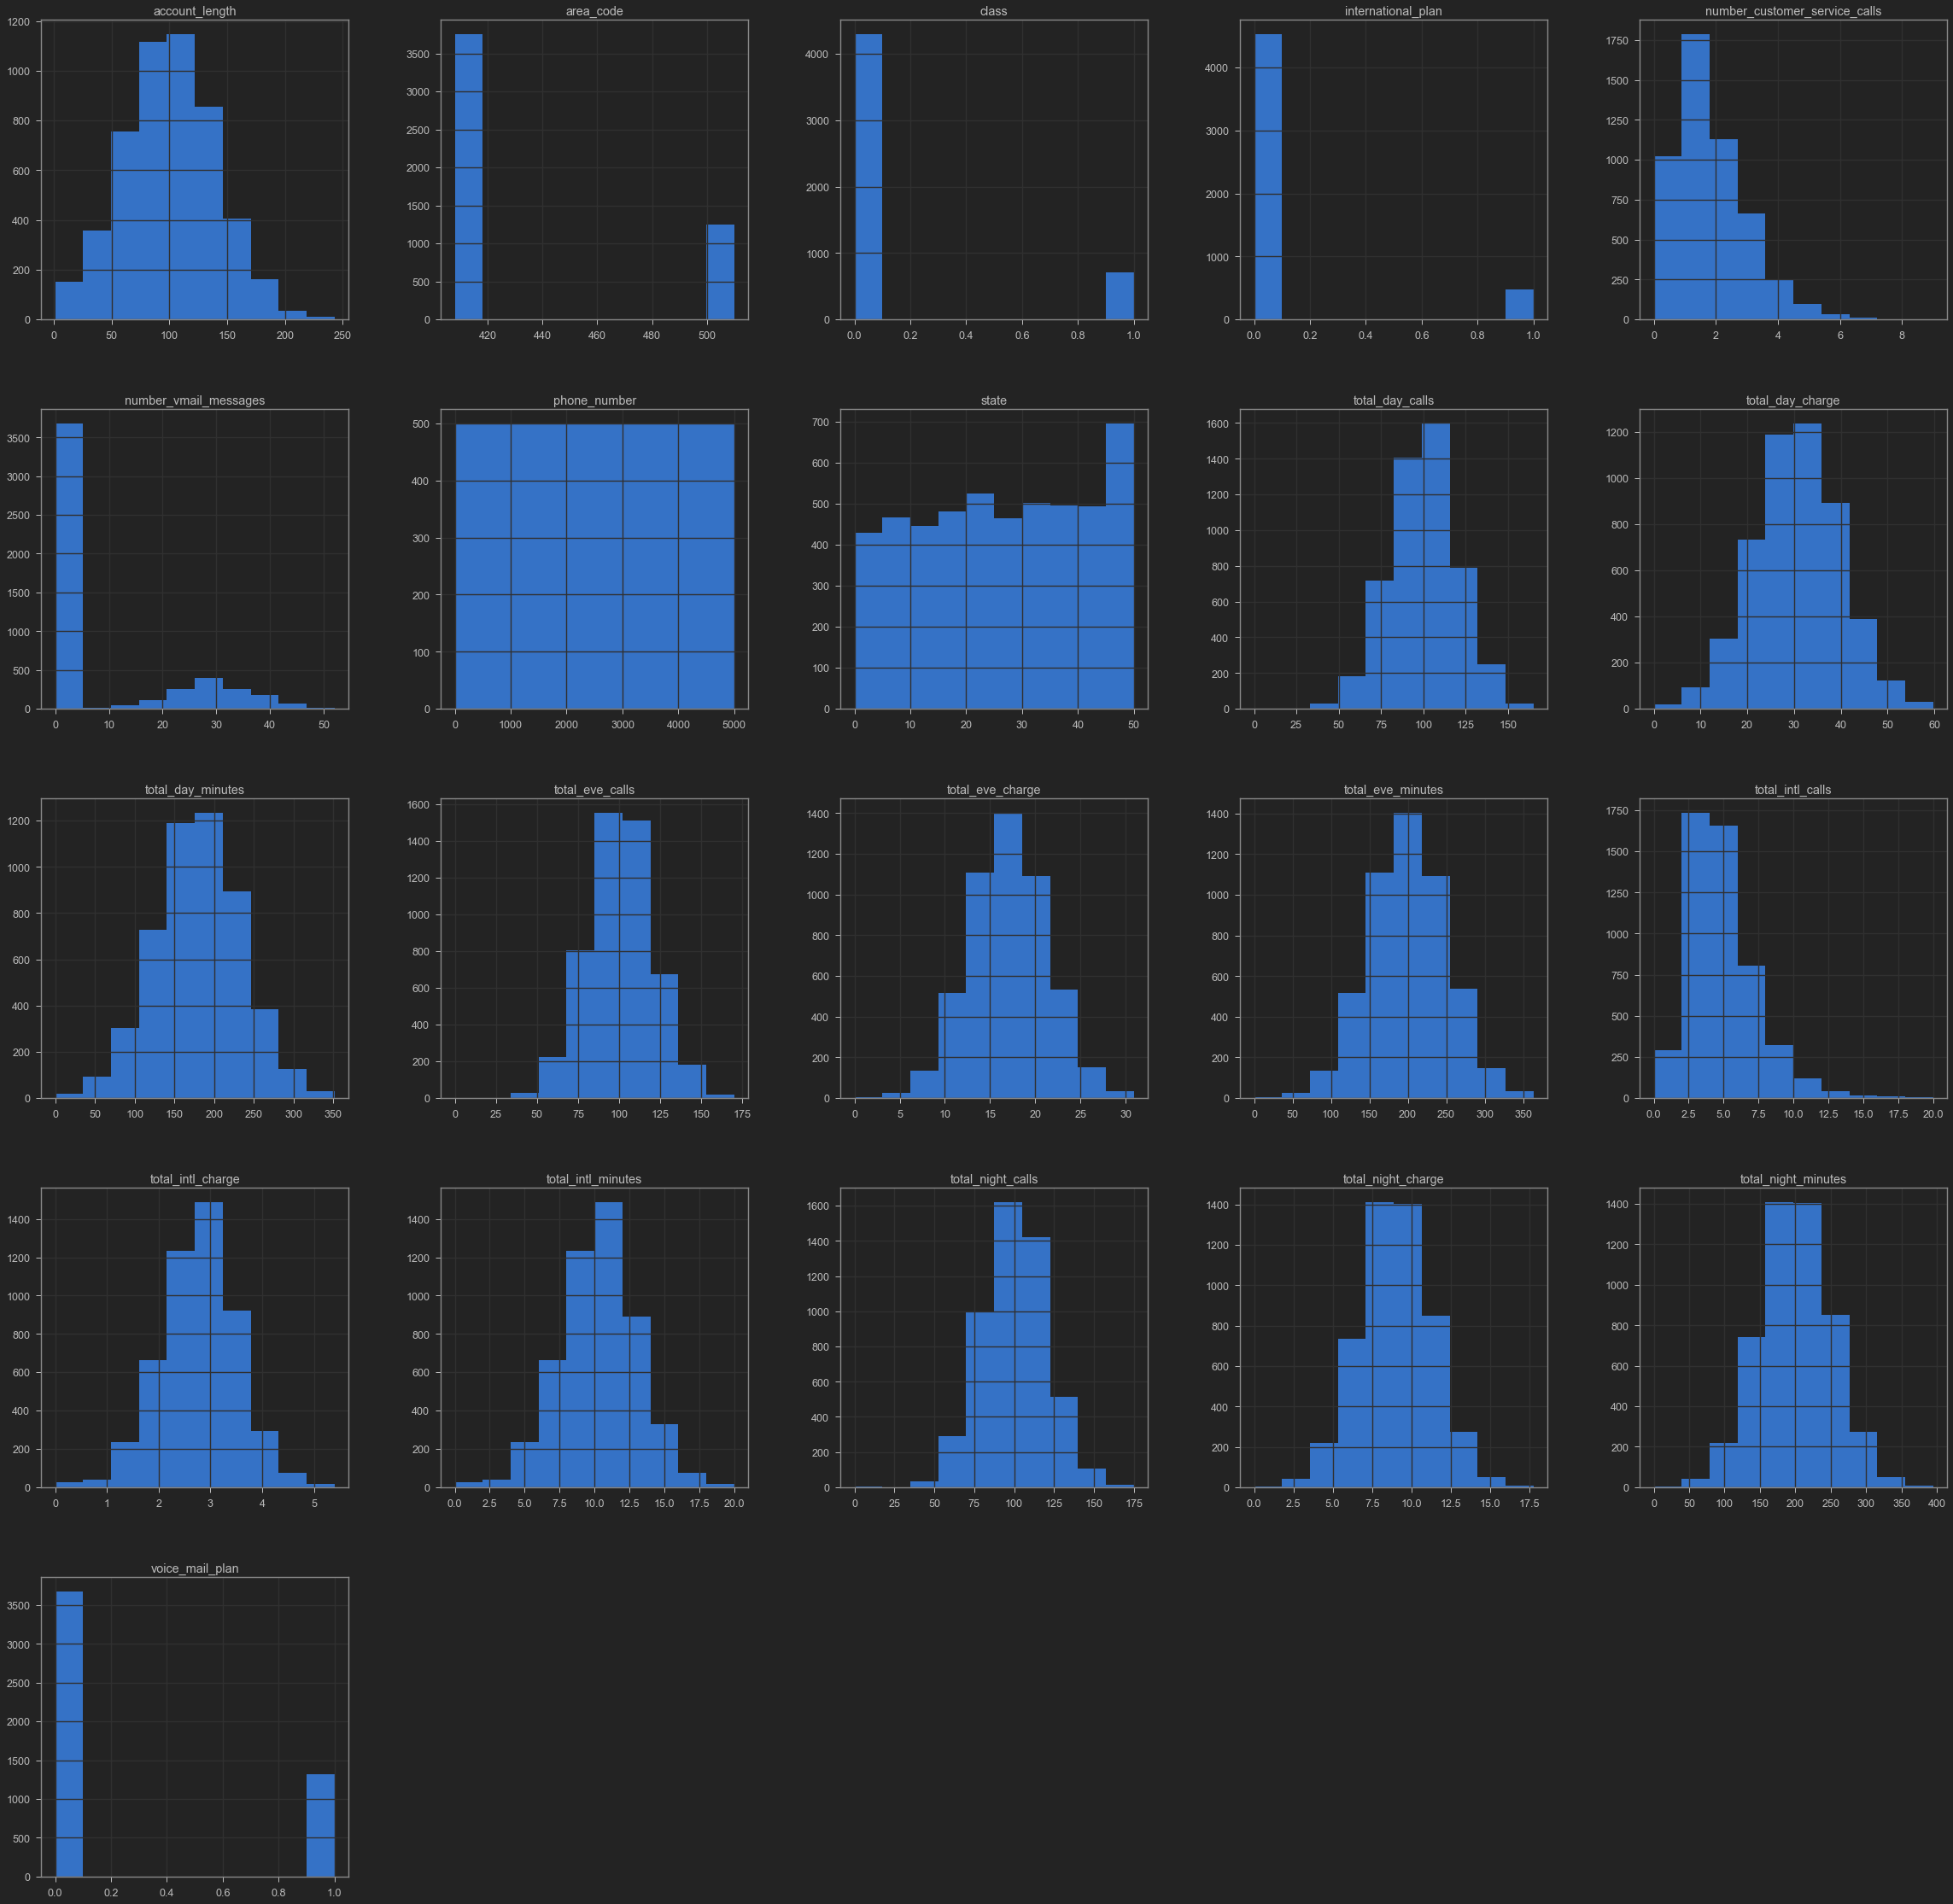

In [22]:
tele_churn.hist(figsize = (40, 40))
plt.show()

In [23]:
tele_churn['class'].value_counts()

0    4293
1     707
Name: class, dtype: int64

In [32]:
# Plot pie Chart to get the information about the percentage of Telecom Customers churning using Plotly histogram

import plotly.graph_objects as go
fig = go.Figure(data = [ go.Pie(labels = ['Retained (0)', 'Left (1)'], values = tele_churn['class'].value_counts())
                       ])
fig.show()

In [35]:
# Plot histogram graph for the international plan service used by the Telecom customers with respect to churned/Retained
fig = px.histogram(tele_churn, x = 'international_plan', color = 'class')
fig.show()

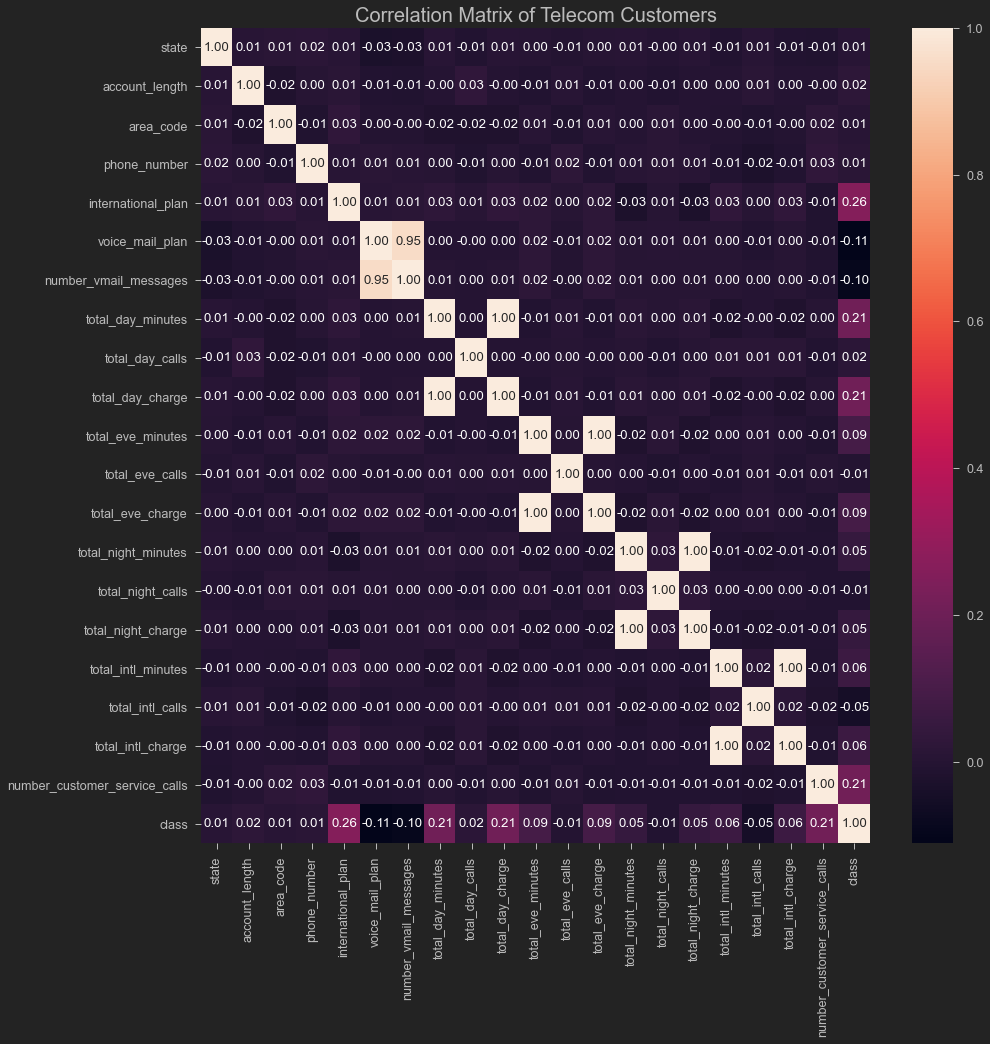

In [39]:
# Correlation Matrix

corr_matrix = tele_churn.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix, annot = True, fmt = '0.2f')
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

# It is clearly shown that "voice_mail_plan" and "number_vmail_messages" are highly correlated.
# It is clearly shown that "total day charge" and "total daily minutes" are highly correlated.

Text(0.5, 1.0, 'Distribution of day charges by churn')

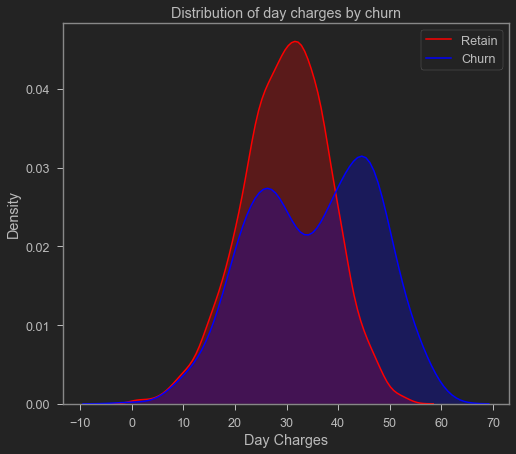

In [40]:
# Churn by day charges
ax = sns.kdeplot(tele_churn.total_day_charge[(tele_churn["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(tele_churn.total_day_charge[(tele_churn["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

Text(0.5, 1.0, 'Distribution of evening charges by churn')

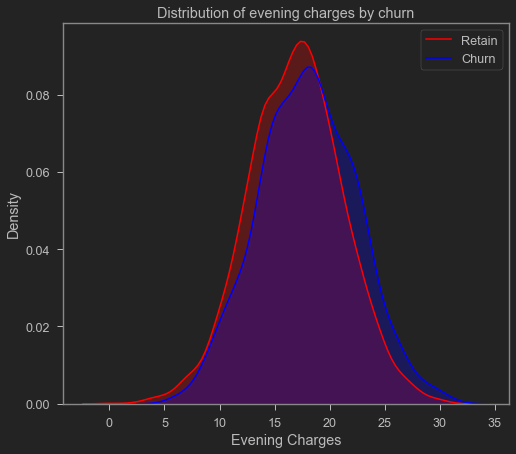

In [41]:
# Churn by evening charges
ax = sns.kdeplot(tele_churn.total_eve_charge[(tele_churn["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(tele_churn.total_eve_charge[(tele_churn["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

MINI CHALLENGE #3:

- Plot the plotly histogram on voice mail plan correlated with Churn feature

In [42]:
fig = px.histogram(tele_churn, x = 'voice_mail_plan', color = 'class')
fig.show()

# TASK #4: IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE MODEL TRAINING 

In [43]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data. 
# Therefore, finding and selecting the most useful features in the dataset is crucial.
# Assigning input features to X and output (Churn) to y

X = tele_churn.drop(["class", "area_code", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = tele_churn["class"]

In [44]:
X

state  account_length  international_plan  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  total_night_charge  total_intl_minutes  total_intl_calls  total_intl_charge  number_customer_service_calls
0        16             128                   0                1                     25              265.1              110             45.07              197.4               99             16.78                244.7                 91               11.01                10.0                 3               2.70                              1
1        35             107                   0                1                     26              161.6              123             27.47              195.5              103             16.62                254.4                103               11.45                13.7                 3               3.70                              1
2        31             137                   0                0                      0              243.4              114             41.38              121.2              110             10.30                162.6                104                7.32                12.2                 5               3.29                              0
3        35              84                   1                0                      0              299.4               71             50.90               61.9               88              5.26                196.9                 89                8.86                 6.6                 7               1.78                              2
4        36              75                   1                0                      0              166.7              113             28.34              148.3              122             12.61                186.9                121                8.41                10.1                 3               2.73                              3
...     ...             ...                 ...              ...                    ...                ...              ...               ...                ...              ...               ...                  ...                ...                 ...                 ...               ...                ...                            ...
4995     11              50                   0                1                     40              235.7              127             40.07              223.0              126             18.96                297.5                116               13.39                 9.9                 5               2.67                              2
4996     49             152                   0                0                      0              184.2               90             31.31              256.8               73             21.83                213.6                113                9.61                14.7                 2               3.97                              3
4997      7              61                   0                0                      0              140.6               89             23.90              172.8              128             14.69                212.4                 97                9.56                13.6                 4               3.67                              1
4998      7             109                   0                0                      0              188.8               67             32.10              171.7               92             14.59                224.4                 89               10.10                 8.5                 6               2.30                              0
4999     46              86                   0                1                     34              129.4              102             22.00              267.1              104             22.70                154.8      

In [45]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: class, Length: 5000, dtype: int64

In [51]:
# Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

MINI CHALLENGE #4:
- Verify that the train/test split was successfull 

In [52]:
X_train.shape

(3500, 18)

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())


RandomForestClassifier()

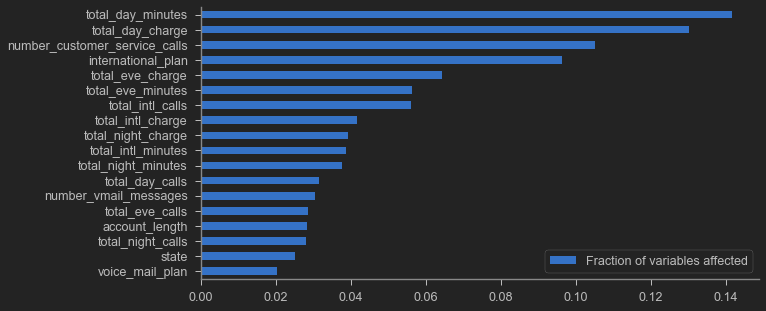

In [56]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

In [ ]:
# The above graph is generated by Random Forest algorithm 
# The graph indicates that "total_day_minutes" tops the list of important features followed by "total_day_minutes" and so on.

# TASK #5: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

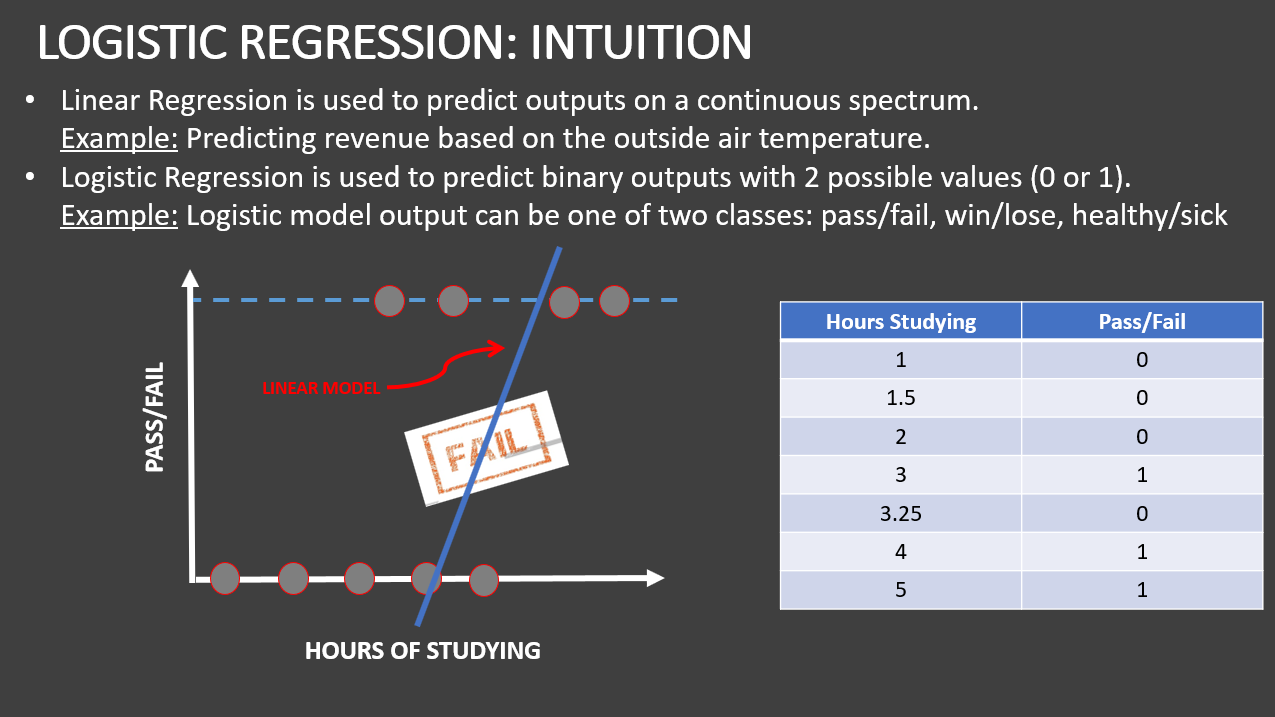

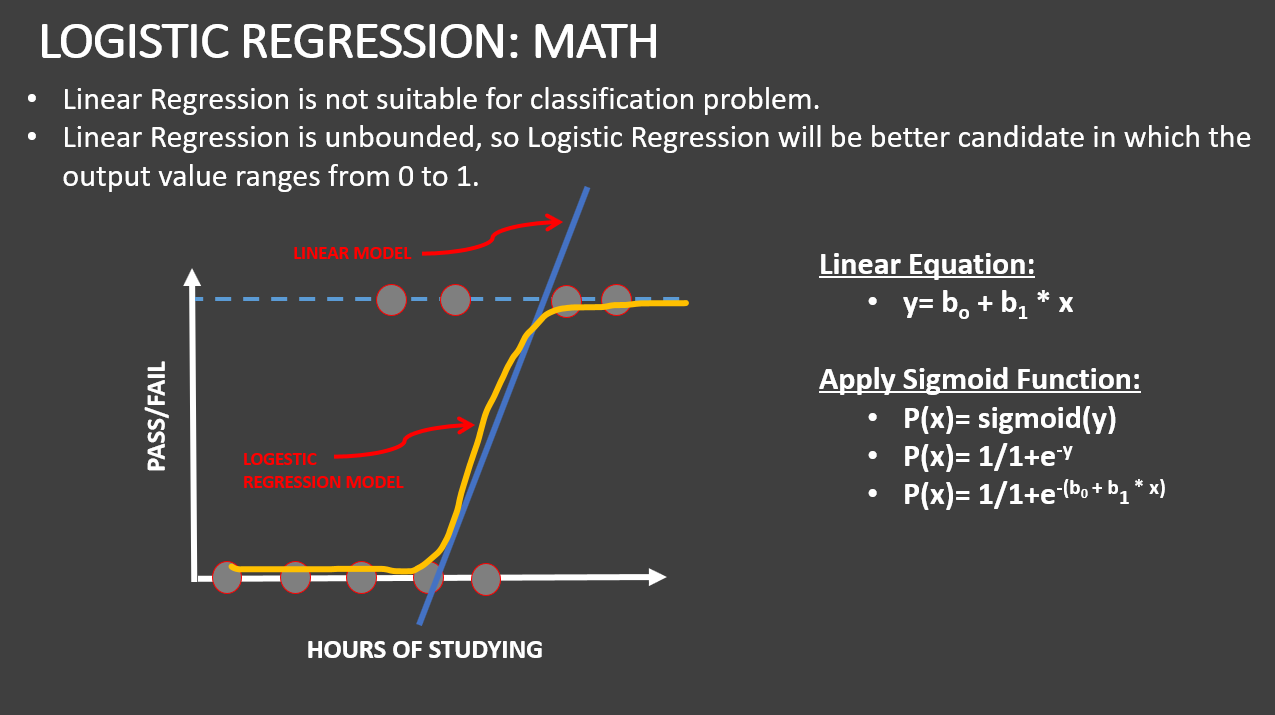

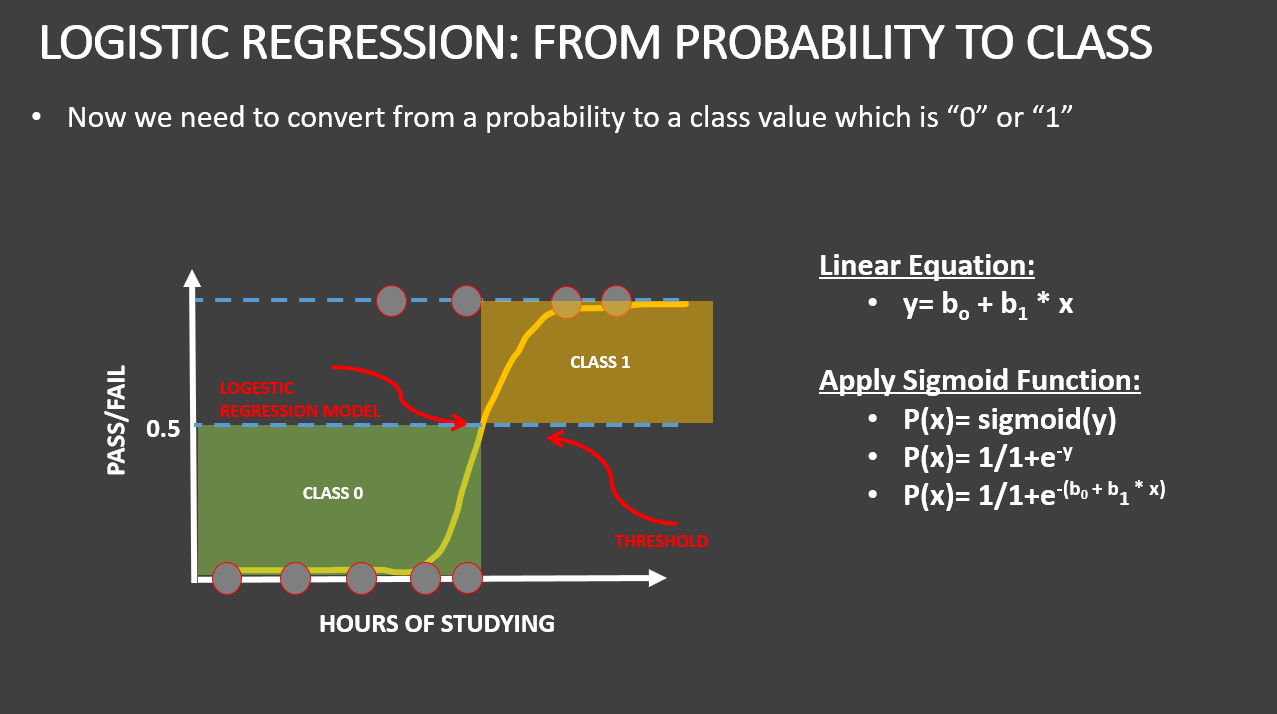

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [58]:
y_predict = model_LR.predict(X_test)

In [59]:
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1282
           1       0.52      0.07      0.13       218

    accuracy                           0.86      1500
   macro avg       0.69      0.53      0.52      1500
weighted avg       0.81      0.86      0.81      1500



MINI CHALLENGE #5:
- Print out the confusion Matrix and comment on the results. 


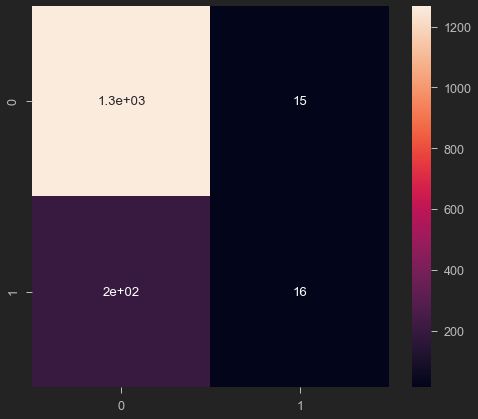

In [63]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# TASK #6: TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER

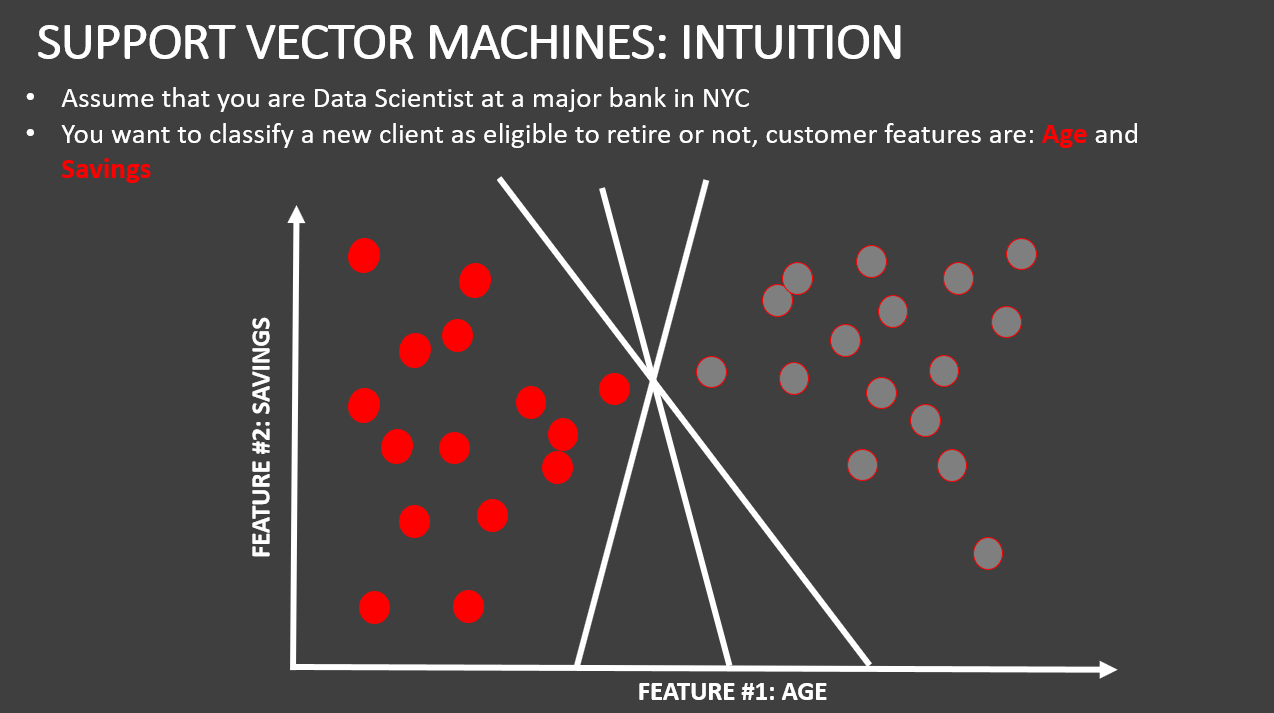

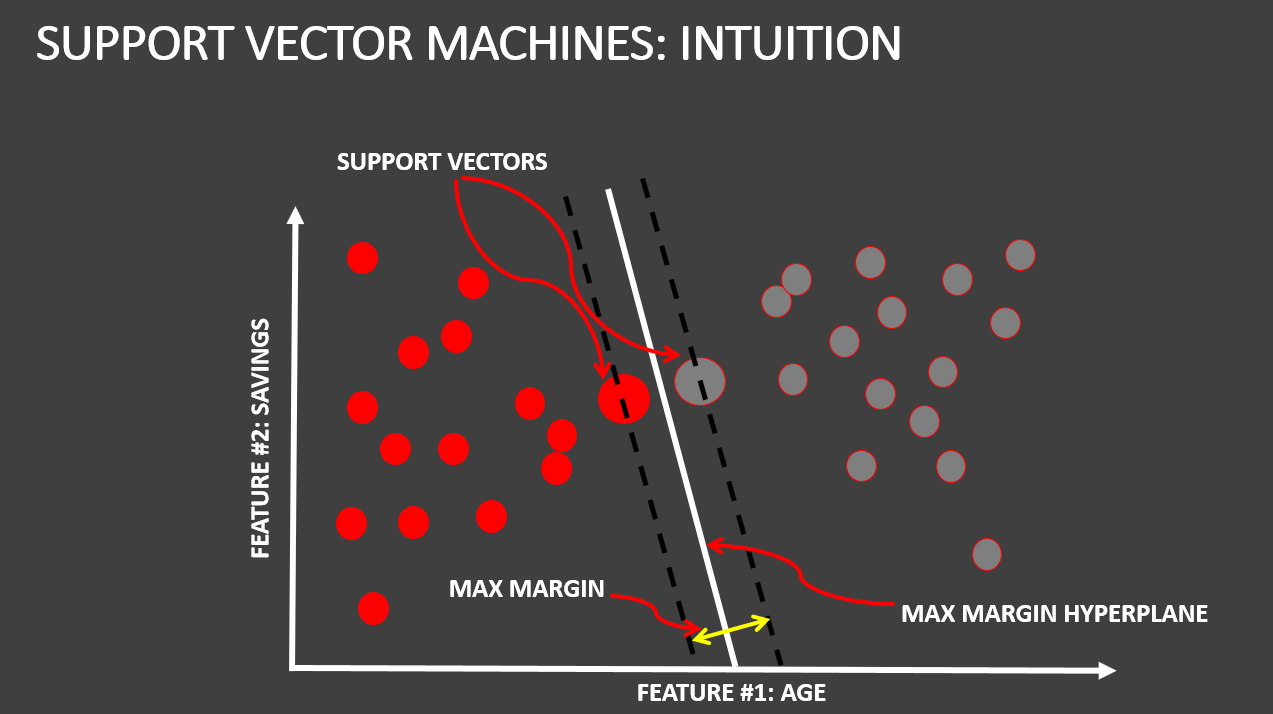

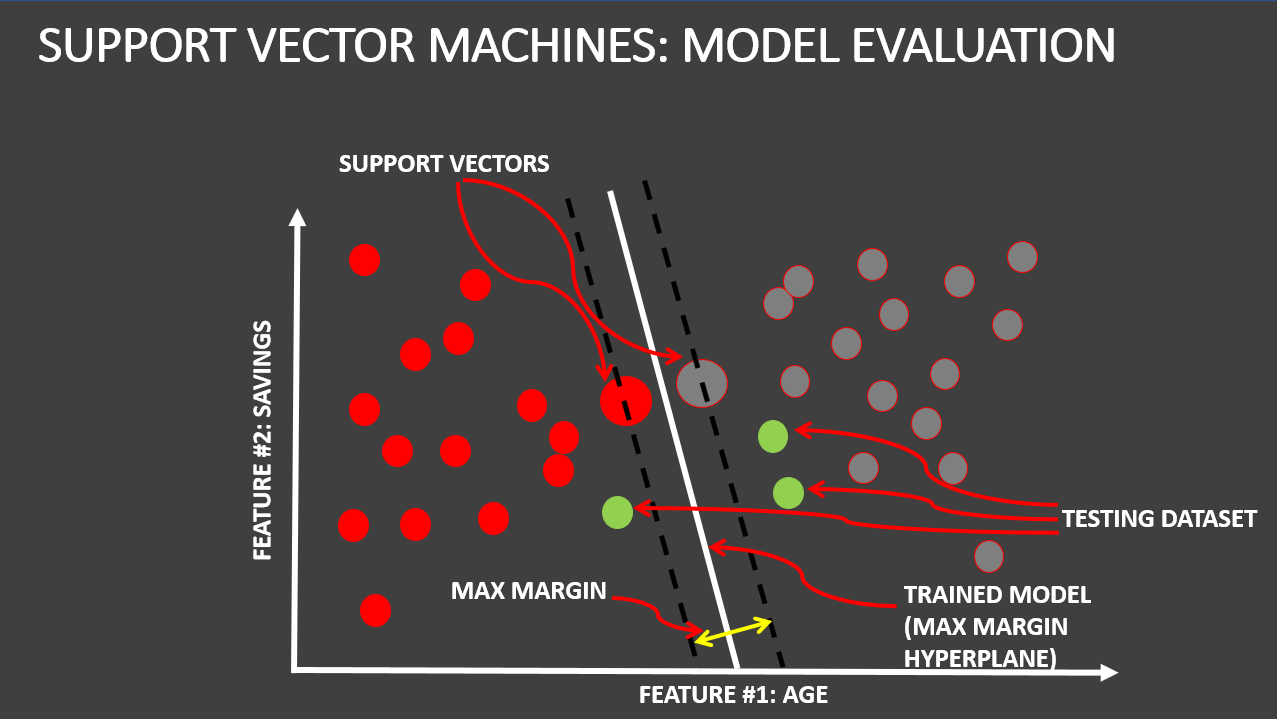

In [72]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svm = LinearSVC(max_iter = 10000)
model_svm = CalibratedClassifierCV(model_svm)
model_svm.fit(X_train, y_train)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=10000))

In [75]:
y_predict = model_svm.predict(X_test)

In [76]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1282
           1       0.60      0.11      0.19       218

    accuracy                           0.86      1500
   macro avg       0.73      0.55      0.56      1500
weighted avg       0.83      0.86      0.82      1500



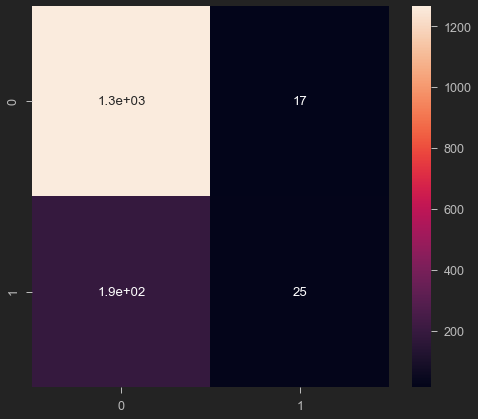

In [77]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# TASK #7: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

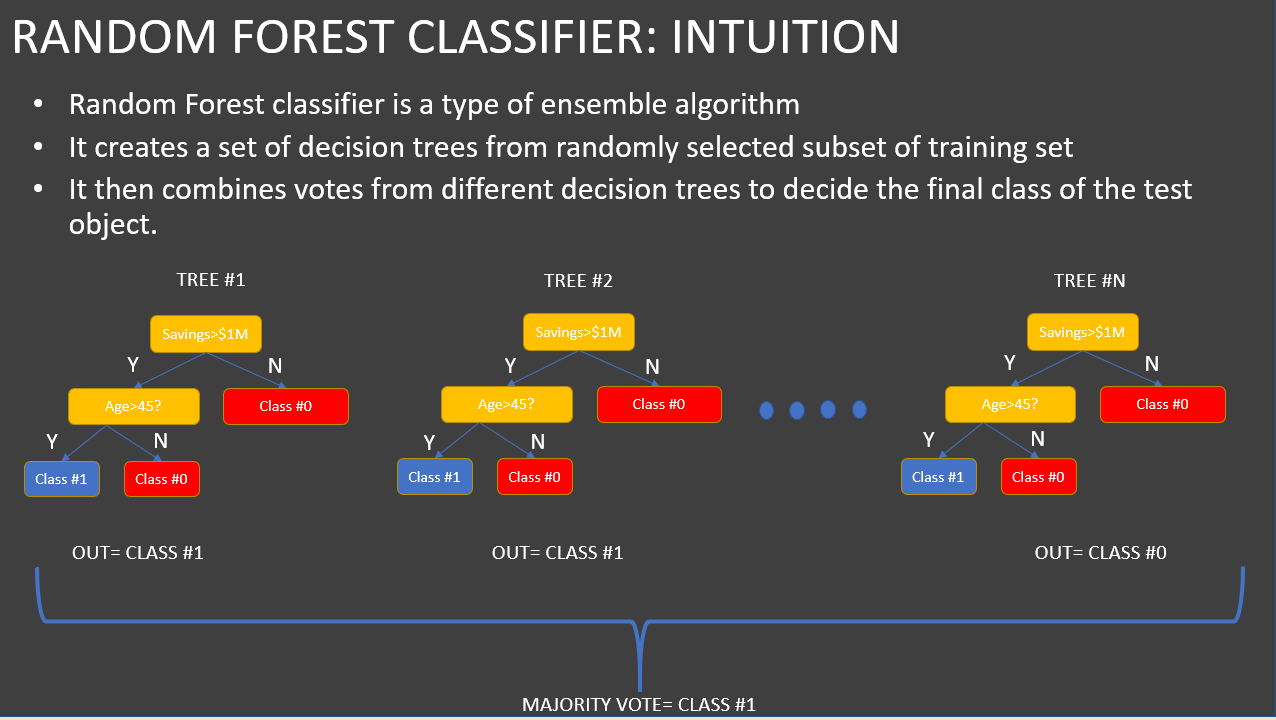

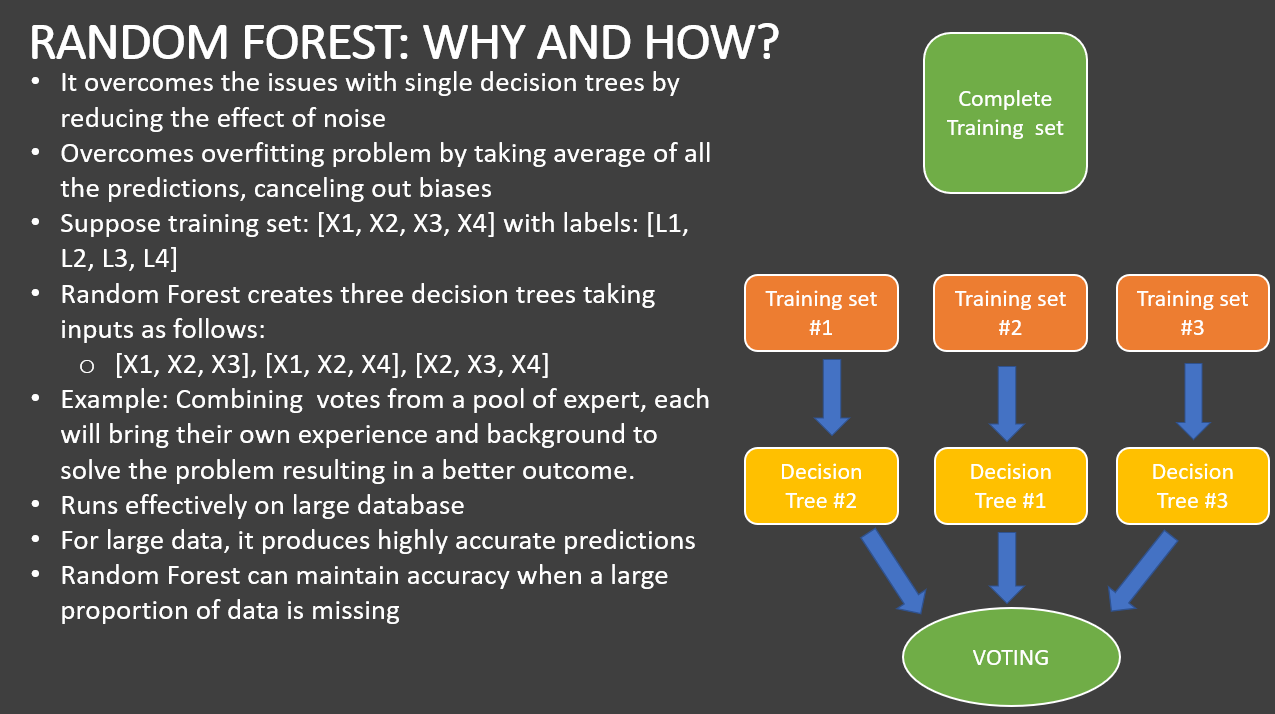

In [78]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
y_predict = model_rf.predict(X_test)

In [81]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1282
           1       0.95      0.79      0.86       218

    accuracy                           0.96      1500
   macro avg       0.96      0.89      0.92      1500
weighted avg       0.96      0.96      0.96      1500



In [82]:
cm = confusion_matrix(y_test, y_predict)

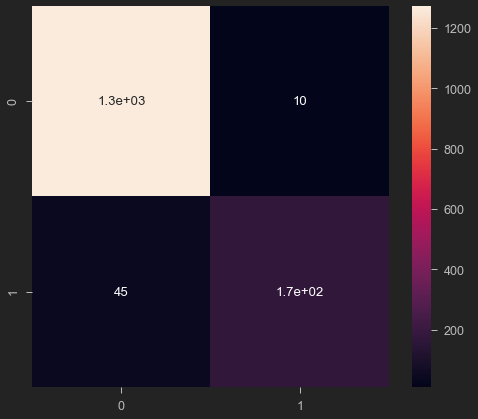

In [84]:
sns.heatmap(cm, annot = True)

# TASK #8: TRAIN AND EVALUATE A K-NEAREST NEIGHBOUR (KNN)

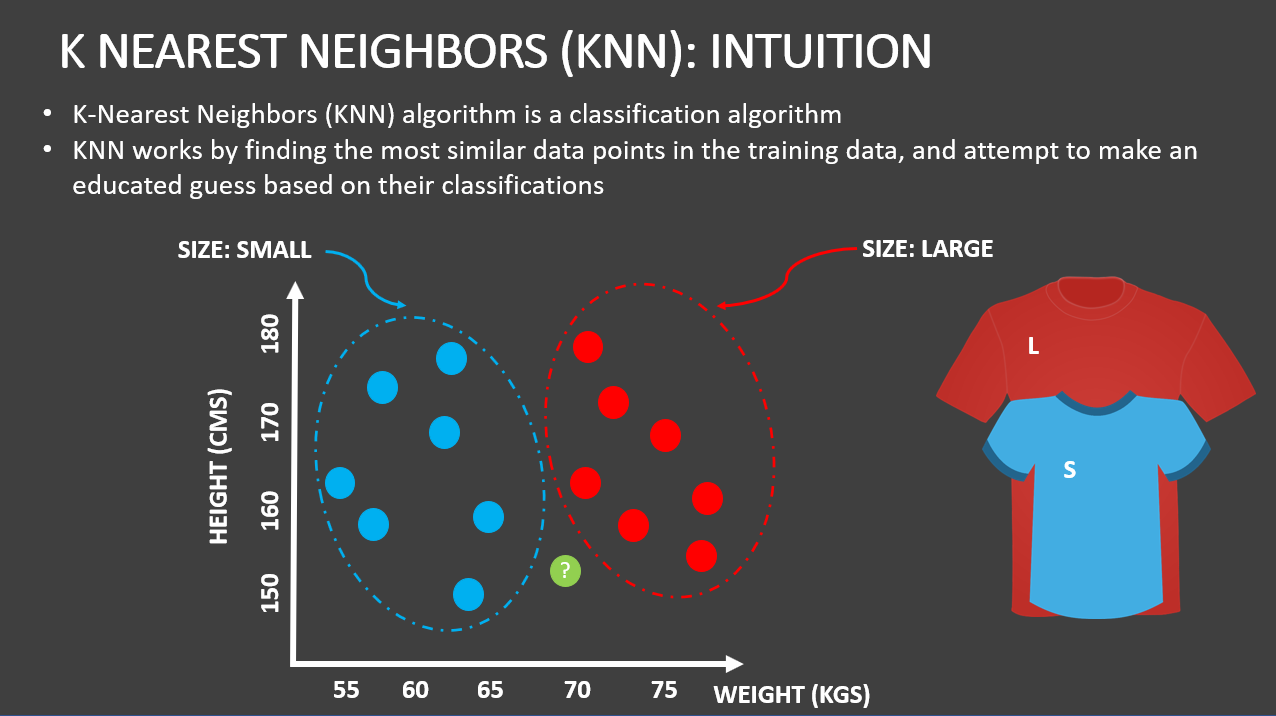

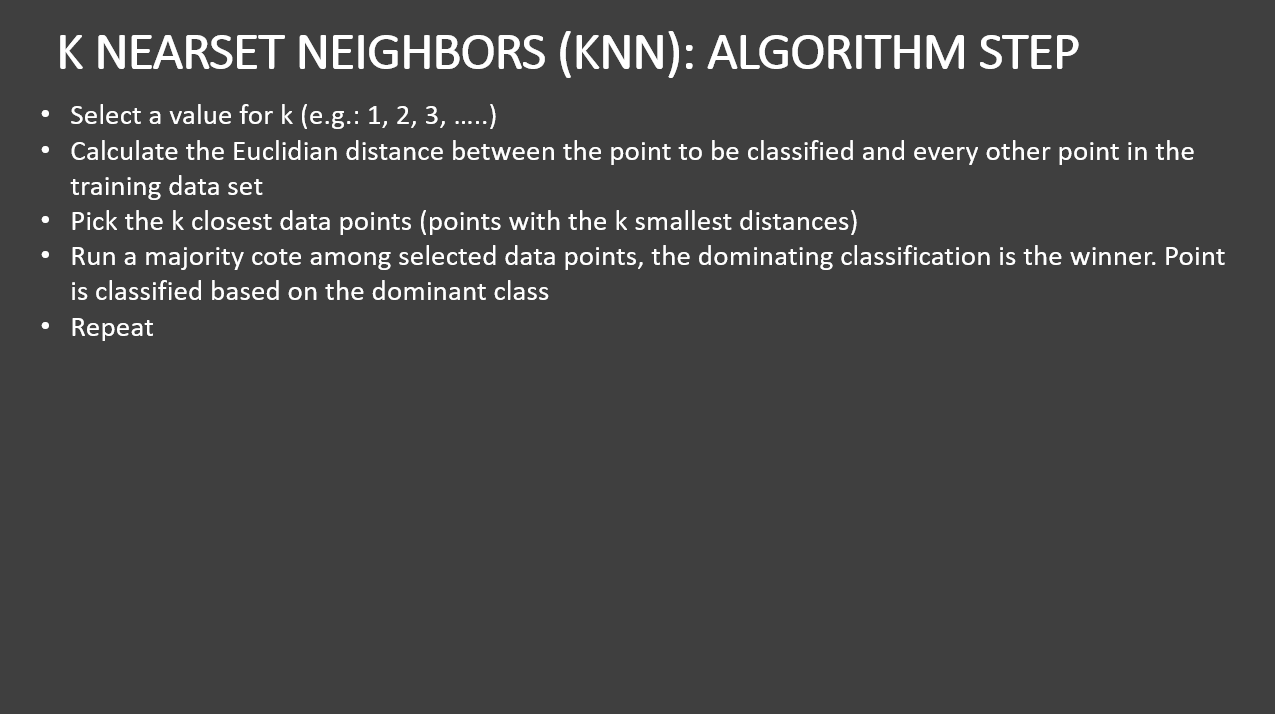

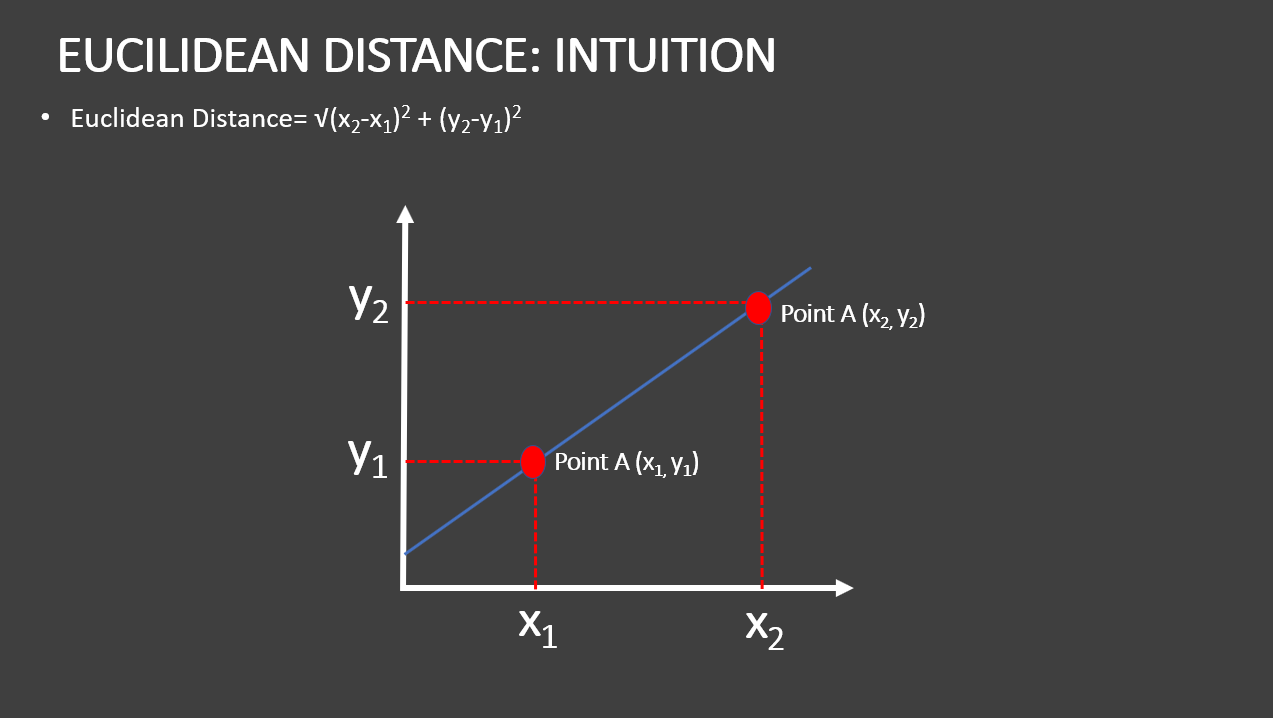

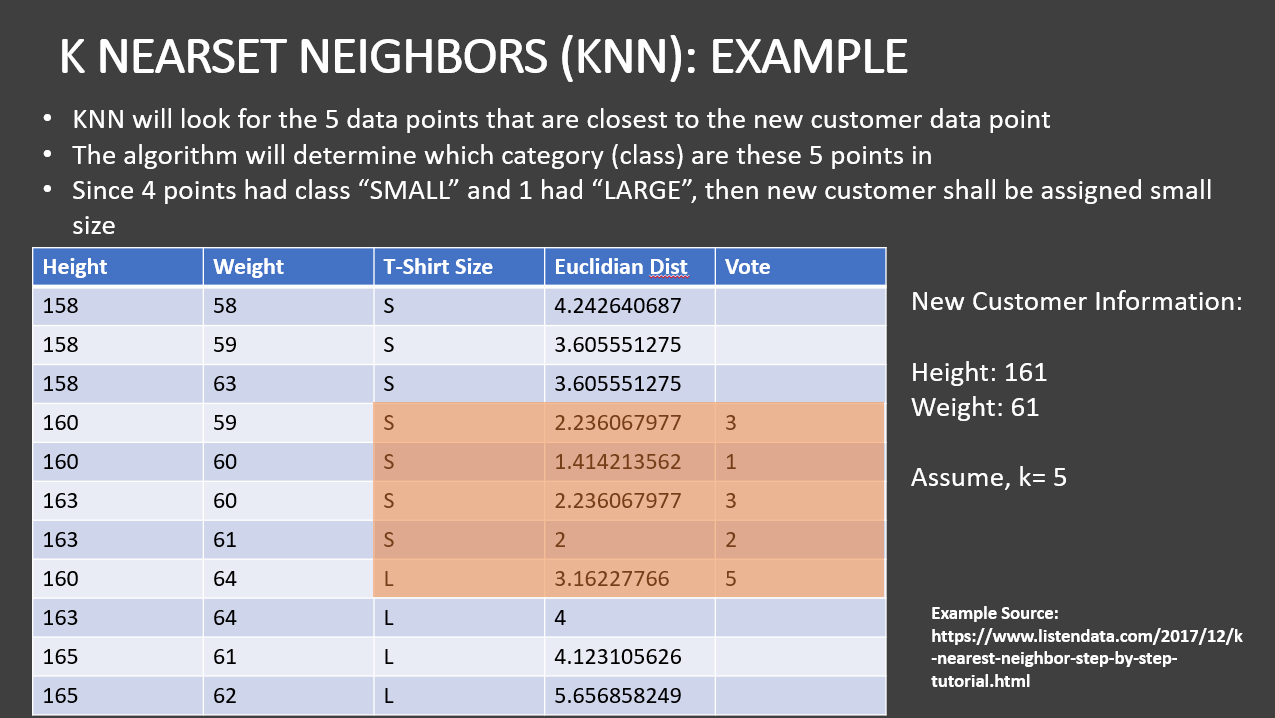

In [85]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)



KNeighborsClassifier()

In [86]:
y_predict = model_knn.predict(X_test)

In [87]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1282
           1       0.68      0.29      0.41       218

    accuracy                           0.88      1500
   macro avg       0.78      0.63      0.67      1500
weighted avg       0.86      0.88      0.85      1500



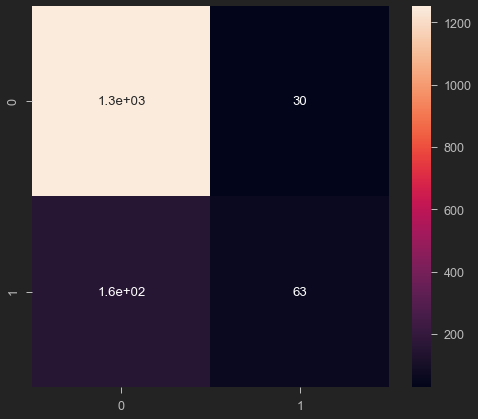

In [89]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot = True)

# TASK #9: TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER

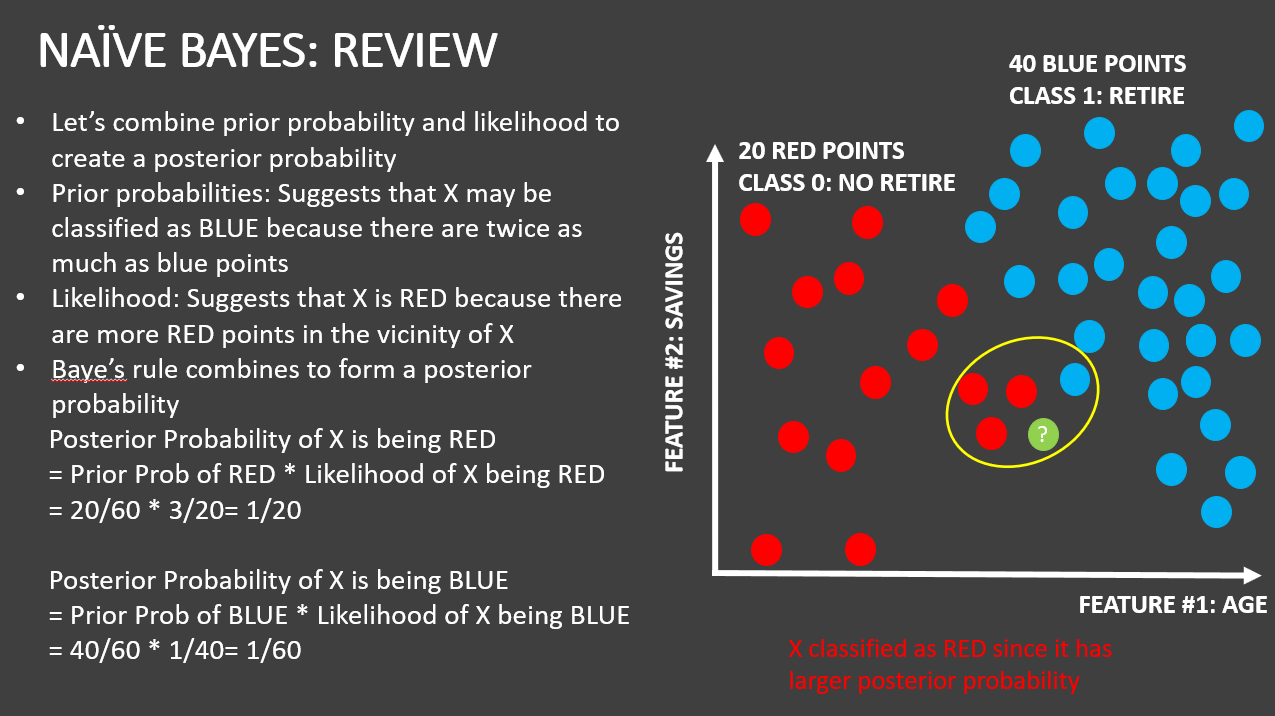

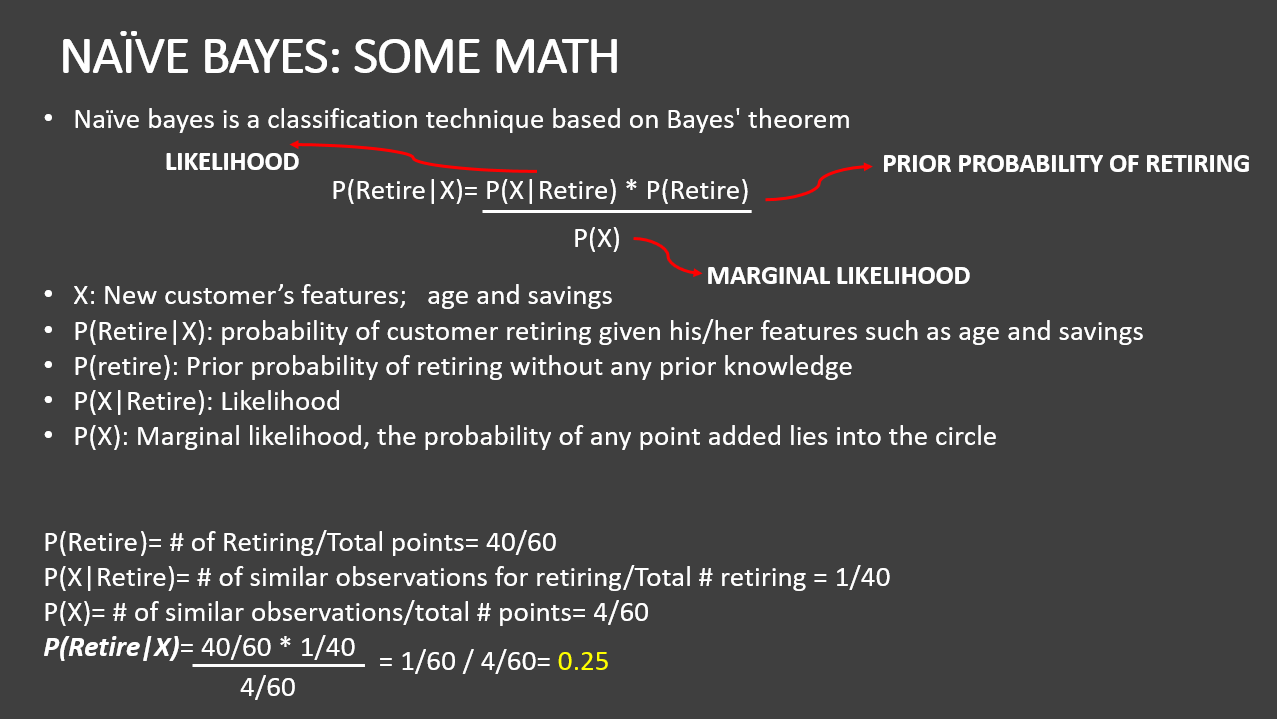

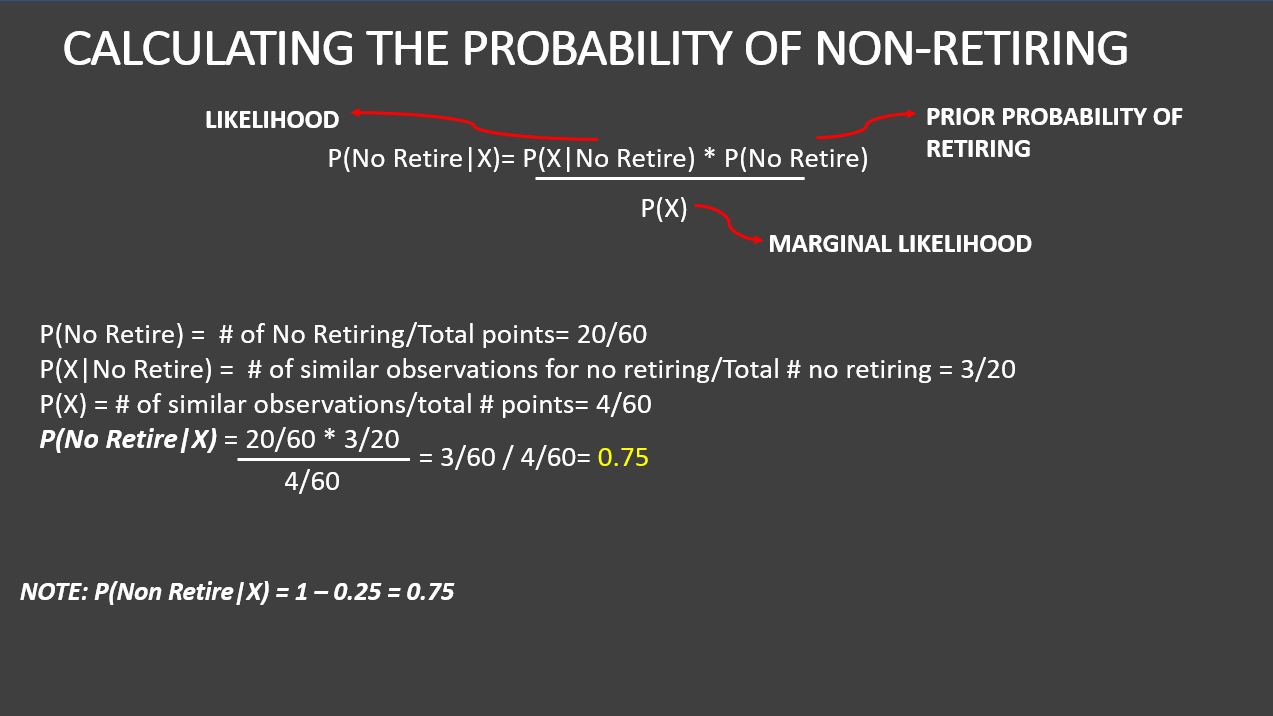

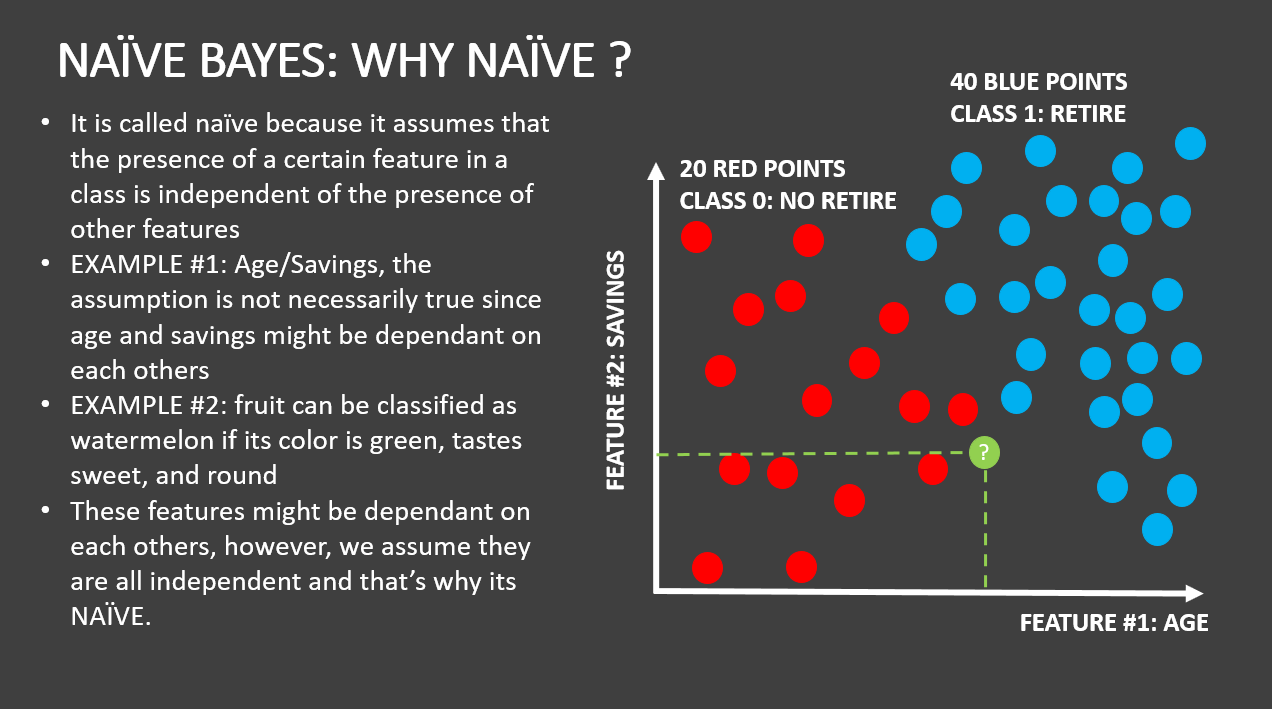

In [91]:
from sklearn.naive_bayes import GaussianNB

In [92]:
 model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [93]:
y_predict - model_gnb.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [94]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1282
           1       0.68      0.29      0.41       218

    accuracy                           0.88      1500
   macro avg       0.78      0.63      0.67      1500
weighted avg       0.86      0.88      0.85      1500



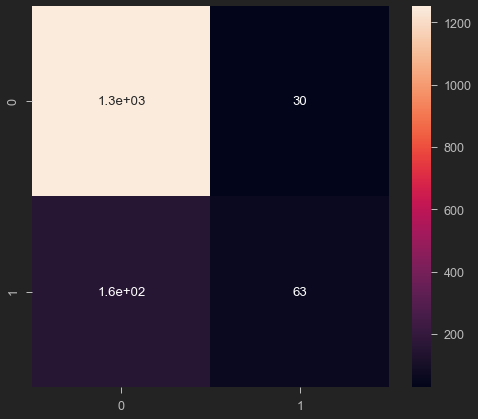

In [95]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# TASK #10: PLOT ROC CURVES FOR THE 5 MODELS AND FIND AUC SCORES

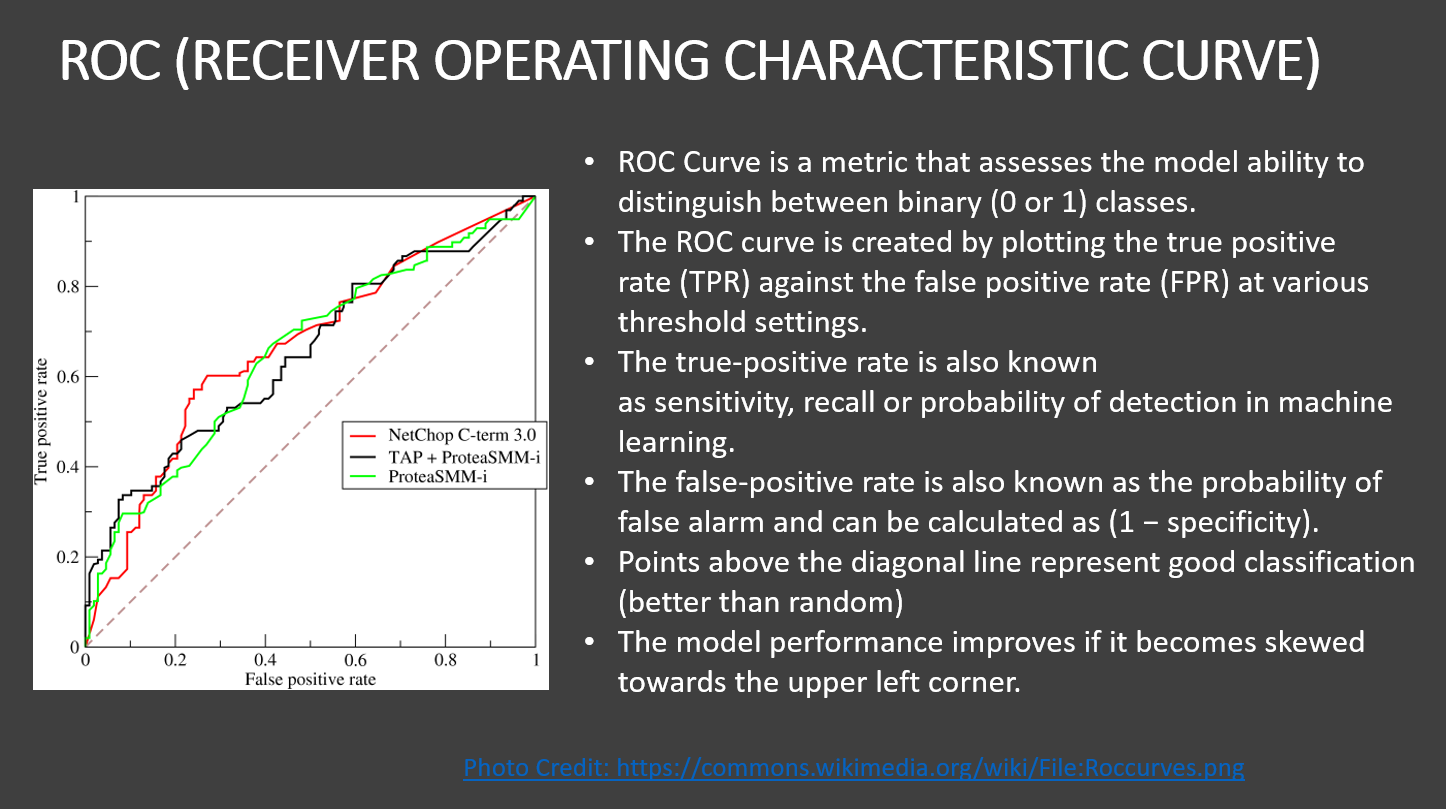

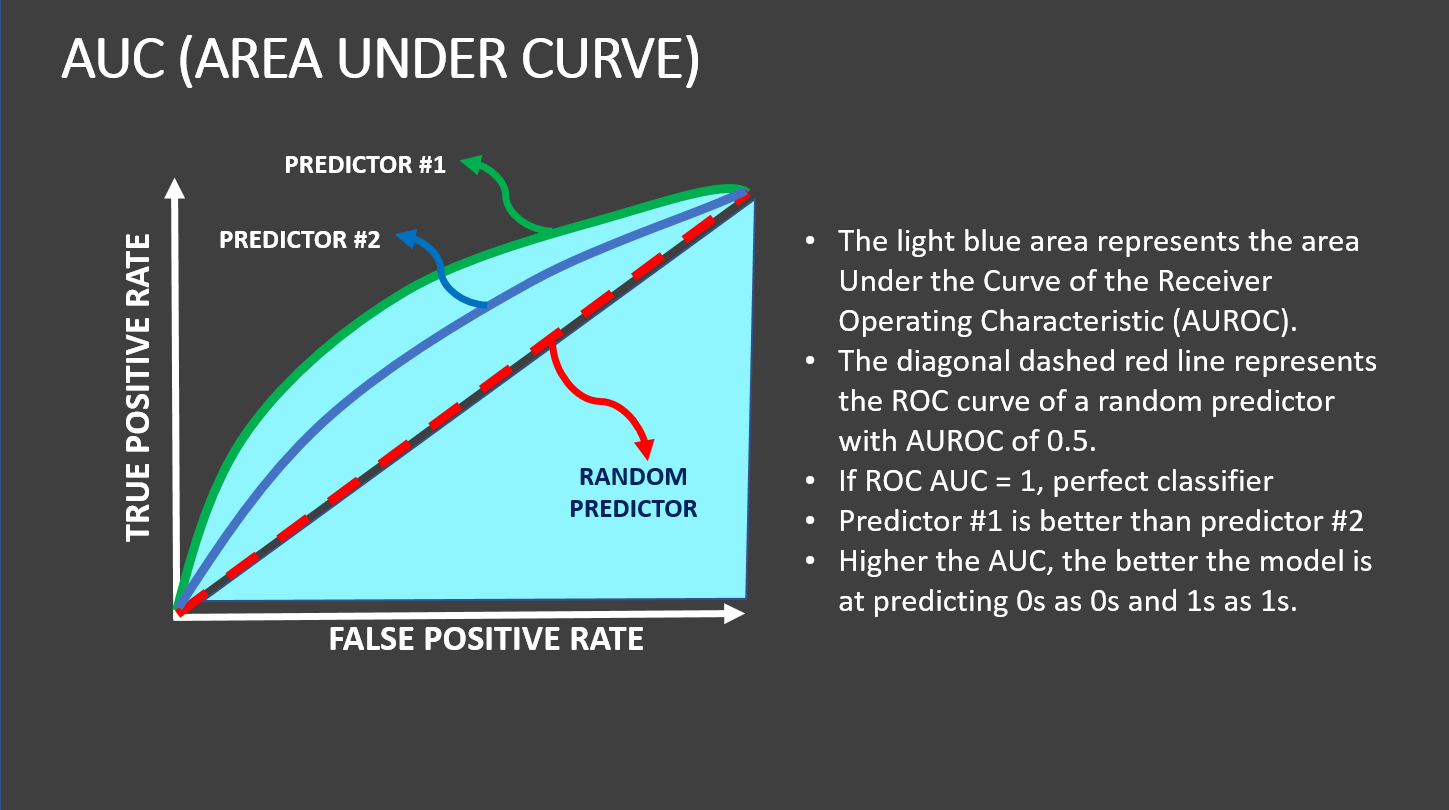

Check this out: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [96]:
model_LR.predict_proba(X_test)

array([[0.84502235, 0.15497765],
       [0.68692281, 0.31307719],
       [0.92378128, 0.07621872],
       ...,
       [0.7897126 , 0.2102874 ],
       [0.87403058, 0.12596942],
       [0.83781446, 0.16218554]])

In [97]:
model_LR.predict_proba(X_test)[:, 1]

array([0.15497765, 0.31307719, 0.07621872, ..., 0.2102874 , 0.12596942,
       0.16218554])

In [98]:
y_test

2756    0
475     0
3703    0
3254    0
581     0
       ..
3214    0
2906    0
575     0
370     0
2011    0
Name: class, Length: 1500, dtype: int64

In [100]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)

In [101]:
fpr1 #false positive rate

array([0.        , 0.        , 0.00156006, 0.00156006, 0.00390016,
       0.00390016, 0.00546022, 0.00546022, 0.00702028, 0.00702028,
       0.00858034, 0.00858034, 0.01092044, 0.01092044, 0.01170047,
       0.01170047, 0.01482059, 0.01482059, 0.01560062, 0.01560062,
       0.01638066, 0.01638066, 0.01794072, 0.01794072, 0.01872075,
       0.01872075, 0.02184087, 0.02184087, 0.02340094, 0.02340094,
       0.02418097, 0.02418097, 0.024961  , 0.024961  , 0.02574103,
       0.02574103, 0.02808112, 0.02808112, 0.02886115, 0.02886115,
       0.03276131, 0.03276131, 0.03354134, 0.03354134, 0.03666147,
       0.03666147, 0.03822153, 0.03822153, 0.03900156, 0.03900156,
       0.04212168, 0.04212168, 0.04290172, 0.04290172, 0.04446178,
       0.04446178, 0.04524181, 0.04524181, 0.04680187, 0.04680187,
       0.05148206, 0.05148206, 0.05304212, 0.05304212, 0.05460218,
       0.05460218, 0.05616225, 0.05616225, 0.05850234, 0.05850234,
       0.06318253, 0.06318253, 0.06942278, 0.06942278, 0.07176

In [102]:
tpr1 #true postivie rate

array([0.        , 0.00458716, 0.00458716, 0.02293578, 0.02293578,
       0.02752294, 0.02752294, 0.0412844 , 0.0412844 , 0.04587156,
       0.04587156, 0.05045872, 0.05045872, 0.05963303, 0.05963303,
       0.08715596, 0.08715596, 0.09174312, 0.09174312, 0.10091743,
       0.10091743, 0.10550459, 0.10550459, 0.1146789 , 0.1146789 ,
       0.11926606, 0.11926606, 0.12844037, 0.12844037, 0.13302752,
       0.13302752, 0.13761468, 0.13761468, 0.14220183, 0.14220183,
       0.1559633 , 0.1559633 , 0.16055046, 0.16055046, 0.16513761,
       0.16513761, 0.17889908, 0.17889908, 0.18807339, 0.18807339,
       0.19266055, 0.19266055, 0.19724771, 0.19724771, 0.21100917,
       0.21100917, 0.21559633, 0.21559633, 0.22477064, 0.22477064,
       0.23853211, 0.23853211, 0.24311927, 0.24311927, 0.24770642,
       0.24770642, 0.25229358, 0.25229358, 0.26146789, 0.26146789,
       0.26605505, 0.26605505, 0.2706422 , 0.2706422 , 0.27522936,
       0.27522936, 0.28440367, 0.28440367, 0.28899083, 0.28899

In [103]:
thresh1 #threshold used to plot the curve

array([1.77662564, 0.77662564, 0.71677211, 0.66709591, 0.6555195 ,
       0.65154717, 0.62658748, 0.60339025, 0.58019531, 0.53786565,
       0.53411562, 0.53331463, 0.52570222, 0.52299948, 0.51769349,
       0.48849629, 0.47873044, 0.47750687, 0.47702558, 0.47483135,
       0.47217173, 0.46844047, 0.45896153, 0.4526146 , 0.45107719,
       0.45060134, 0.43349411, 0.43045668, 0.42081281, 0.41268759,
       0.41220102, 0.41217004, 0.40795855, 0.40776137, 0.40761131,
       0.3982543 , 0.39498318, 0.39323261, 0.3924538 , 0.3919784 ,
       0.39056963, 0.38713622, 0.38653593, 0.38569081, 0.37794193,
       0.37714995, 0.37184928, 0.37026752, 0.36886436, 0.36600742,
       0.35867085, 0.35725691, 0.35711278, 0.34659832, 0.34556823,
       0.3430976 , 0.34039199, 0.33996271, 0.33851207, 0.33748998,
       0.33379315, 0.3334157 , 0.33160796, 0.32948604, 0.32691536,
       0.32544208, 0.32188653, 0.32032523, 0.3192097 , 0.31917974,
       0.31191109, 0.30966374, 0.30304765, 0.30295595, 0.30131

In [104]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [105]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.7449763128139805
Support Vector Machine:  0.7983977157251427
Random Forest:  0.9394992772187952
K-Nearest Neighbors:  0.7099589946900629
Naive Bayes:  0.868861726946142


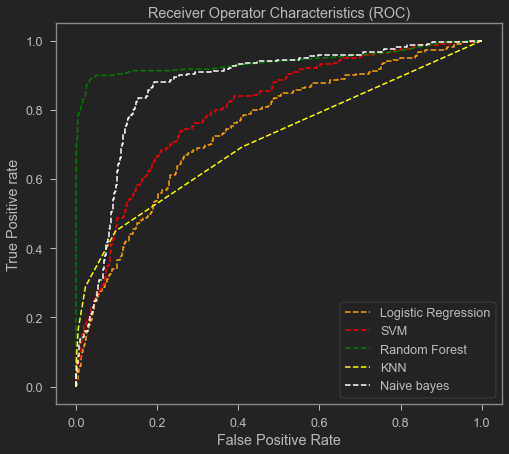

In [106]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

The graph represents that Random Forest algorithm produced the best AUC. Therefore, it is clear that Random Forest model did a better job of classifying the churned/retained telecom customers.

# TASK #11: CONCLUSION & PROJECT RECAP

In [107]:
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1282
           1       0.95      0.79      0.86       218

    accuracy                           0.96      1500
   macro avg       0.96      0.89      0.92      1500
weighted avg       0.96      0.96      0.96      1500



Amongst all the trained models, Random Forest Classifier algorithm produced the highest Area under the ROC curve (AUC).

The following scores are the results of the Random Forest Classifier model

1. Accuracy: ~96% label accuracy
2. Precision: ~96% labeled as Retained customers and ~94% labeled as churned customers
3. Recall: ~99% labeled as Retained customers and ~76% labeled as churned customers

Note: We can improve this model even more better by using "Grid Search" method.

Great resource on Grid Search: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

# GREAT JOB!